# Computer Vision Challenge: 102 Category Flower Dataset

**Abstract** *We train the pretrained ResNet50 model on a dataset consisting of images of $102$ classes of flowers. Given an image of an arbitrary flower from any of these classes, the resulting model will be able to predict - with a certain accuracy - which exact class the flower belongs to.*

<div style="text-align:center;">
    <img src="./flowerclassification.jpg" style="width:65%;">
</div>

We train a neural network to classify images of different types of flowers. Instead of training a new neural network from scratch we make use of the concept of transfer learning. In transfer learning, a pretrained model, which has been trained previously for a specific task, is fine-tuned for a new but related task. This is achieved by freezing early layers and retraining only the later layers of the pretrained model. In this way, much of the knowledge the model had gained during its original training is preserved. For example, when a model is trained to classify images of cars, it often learns to extract low-level features such as edges or local textures in its early layers. But if the model is later retrained to classify images of busses, the extraction of such general features is likely to be still useful. The preservation of the knowledge of the pretrained model leads to an essential advantage in transfer learning. Namely, starting from a pretrained model typically requires much smaller amounts of data, computational resources and time to achieve similar results as in the training of an entirely new model.

<div style="text-align:center;">
    <img src="./transferlearning.jpg" style="width:80%;">
</div>

In our specific setting, we make use of the pretrained ResNet50 model. This model is a convolutional neural network consisting of $50$ layers which has been trained for image classification tasks on the ImageNet dataset, containing more than $14$ million images from $1000$ classes. We retrain this model on a set of $102$ flower classes, which can be accessed via the link

<http://www.robots.ox.ac.uk/~vgg/data/flowers/102/>

Our procedure consists of the following four steps:

1. We download the necessary data.
2. We split the data into training, validation and test sets and prepare it for the training of the model.
3. We train the model.
4. We evaluate the model.

We begin with downloading the data.

## 1.) Downloading the data

The data we need to download consists of

* The file [102flowers.tgz](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz), containing $8189$ images of flowers belonging to $102$ classes.
* The file [imagelabels.mat](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat), containing the labels associated to the images.

In order to carry out the download, we first define two functions: One function to actually download the images and the labels and another function to sort the downloaded images according to their labels and move them to the corresponding directory.


In [1]:
import os
import tarfile
from urllib.request import urlretrieve
from shutil import copyfile



# Function to download (and extract) the images and the labels
def download(url,data_path):
    file_name = url.split('/')[-1]
    dest_path = os.path.join(data_path, file_name)
    if not os.path.isfile(dest_path):
        print("Downloading", file_name)
        urlretrieve(url, dest_path) # Download the file
        if dest_path.endswith('.tgz'):
            tarfile.open(dest_path).extractall(path=data_path) # Extract the contents of the downloaded file if it is a tgz-file



# Function to sort the images according to their classes and move them to the corresponding directory
def sort_images(dir_name,cwd,images_with_labels):
    cur_dir_path = os.path.join(cwd, dir_name)
    if not os.path.exists(cur_dir_path):
        os.mkdir(cur_dir_path)
    for image_with_label in images_with_labels:
        image = image_with_label[0]
        label = image_with_label[1]
        class_dir = os.path.join(cwd, dir_name, label)
        if not os.path.exists(class_dir):
            os.mkdir(class_dir) # Create the directory corresponding to the class of the current image if it has not yet been created
        source_path = str(image)
        destination_path = os.path.join(cwd,dir_name, label, source_path.split(os.sep)[-1])
        copyfile(source_path, destination_path) # Move the image to the directory corresponding to its class


With these functions at hand, we can now proceed with downloading the data. In the cell below, we perform the following steps:

1. We create the directory in which the data will be stored.
2. We use the ```download``` function defined above to download both the images and the labels.
3. We rename the downloaded labels, which consist of integers ranging from $1$ to $102$, by the names of the actual species of flowers represented by the labels. To this end we make use of the file cat_to_name.json, which associates the correct flower name to each such integer.
4. We form pairs consisting of the images and their associated labels.
5. We use the ```sort_images``` function defined above to sort the images according to their labels and move them to a corresponding directory.

In [2]:
import glob
import numpy as np
import json
from scipy.io import loadmat
     

     
# Create directory for the data
data_path = "flower_classification"
if not os.path.exists(data_path):
    os.mkdir(data_path)



# Carry out the download function to download (and extract) the images and the labels
images_url = "http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"
labels_url = "http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat"

download(images_url,data_path)
download(labels_url,data_path)



# Replace the labels downloaded above by the actual flower names via the json-file "cat_to_name"
with open("cat_to_name.json", "r") as f:
    cat_to_name = json.load(f)

image_labels_path = os.path.join(data_path, 'imagelabels.mat')
image_labels = loadmat(image_labels_path)["labels"][0]
image_labels = [cat_to_name[str(label)] for label in image_labels]
     
# Print all unique labels in the image_labels array and their number
unique_labels = np.unique(image_labels)
print("Number of unique labels:", len(unique_labels)) 
print("Unique labels:", unique_labels)



# Associate each image with the corresponding label
images = glob.glob(os.path.join(data_path, 'jpg', '*.jpg'))
images_with_labels = np.array([i for i in zip(images, image_labels)])



# Carry out the sort_images function to sort the images according to their classes and move them to the corresponding directory
cwd = os.getcwd()
dir_name=os.path.join(data_path,'classes')
sort_images(dir_name,cwd,images_with_labels)


Number of unique labels: 102
Unique labels: ['alpine sea holly' 'anthurium' 'artichoke' 'azalea' 'ball moss'
 'balloon flower' 'barbeton daisy' 'bearded iris' 'bee balm'
 'bird of paradise' 'bishop of llandaff' 'black-eyed susan'
 'blackberry lily' 'blanket flower' 'bolero deep blue' 'bougainvillea'
 'bromelia' 'buttercup' 'californian poppy' 'camellia' 'canna lily'
 'canterbury bells' 'cape flower' 'carnation' 'cautleya spicata'
 'clematis' "colt's foot" 'columbine' 'common dandelion' 'corn poppy'
 'cyclamen' 'daffodil' 'desert-rose' 'english marigold' 'fire lily'
 'foxglove' 'frangipani' 'fritillary' 'garden phlox' 'gaura' 'gazania'
 'geranium' 'giant white arum lily' 'globe thistle' 'globe-flower'
 'grape hyacinth' 'great masterwort' 'hard-leaved pocket orchid'
 'hibiscus' 'hippeastrum' 'japanese anemone' 'king protea' 'lenten rose'
 'lotus lotus' 'love in the mist' 'magnolia' 'mallow' 'marigold'
 'mexican aster' 'mexican petunia' 'monkshood' 'moon orchid'
 'morning glory' 'orange d

## 2.) Preparing the data

The next step is to split the data into a training set, a validation set and a test set and to prepare it for the training of the model. In the following cell, the split is performed using the ```splitfolders``` function to divide the data into three sets of suitable sizes: $60$% of the original images are used for training, $20$% of the original images are used for validation and the remaining $20$% are used for testing.

In [3]:
import splitfolders



cwd = os.getcwd()
input_folder = os.path.join(cwd, "flower_classification\classes")
output_folder = "flower_classification\\flower_classification_data_split"

# Create the directory for the splitted data
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Split the data into a training set (60%), a validation set (20%), and a test set (20%)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.6, .2, .2))


Copying files: 8189 files [01:15, 107.94 files/s]


After splitting the data, we now have to preprocess it in such a way that it can be handled by the ResNet50 model. Additionaly, we want to augment the training data and the validation data, i.e. we artificially increase the diversity of these data sets in order to help the model to generalize to unseen data and prevent overfitting. We do so in two steps:

1. We use ```tf.keras.preprocessing.image.ImageDataGenerator``` to set the rules for how the data should be preprocessed and augmented. In particular, we specify the preprocessing function to be applied to input images as ```tf.keras.applications.resnet50.preprocess_input```. This function guarantees that the images are preprocessed according to the ResNet50 requirements. Moreover, for our data augmentation purposes, we specify that
    - The images can be randomly sheared by up to $20$%.
    - The images can be randomly zoomed in or out by up to $20$%.
    - The images can be randomly flipped horizontally.
      
    In case of the test data we refrain from data augmentation as we want to evaluate our model on the original data.


2. We then use ```flow_from_directory```, which generates badges of preprocessed and augmented data according to the specified rules. In this function we further specify that

   - The input images are resized to $224 \times 224$ pixels. This size is the recommended ```target_size``` for the ResNet50 model, as the ImageNet dataset, on which this model was trained, also consists of images of size $224 \times 224$ pixels.
   - The ```batch_size``` for the training set and the validation set is set equal to $32$. This means that, in the training process the model gets to see $32$ images during each training iteration.
   - The ```class_mode``` is chosen as categorical. This constitutes a typical way of representing the labels in a multiclass classification problem, in which the labels are converted into one-hot-encoded vectors. In each such vector, all elements are $0$ except for the index corresponding to the class label, which is set to $1$.

In [4]:
import tensorflow as tf



img_height, img_width = (224,224)
batch_size = 32

# Directories of the training set, the validation set and the test set
train_data_dir = os.path.join(output_folder, "train")
valid_data_dir = os.path.join(output_folder, "val")
test_data_dir = os.path.join(output_folder, "test")



# Specify the rules for preprocessing and augmenting the training data and the validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# For the test data we de not use augmentation as we want to evaluate the model on the original data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)



img_height, img_width = (224,224)
batch_size = 32

# Directories of the training set, the validation set and the test set
train_data_dir = os.path.join(output_folder, "train")
valid_data_dir = os.path.join(output_folder, "val")
test_data_dir = os.path.join(output_folder, "test")



# Define generators to generate badges of training data, validation data and test data according to the rule specified above
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = "categorical")

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size = batch_size,
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode="categorical")


Found 4874 images belonging to 102 classes.
Found 1602 images belonging to 102 classes.
Found 1713 images belonging to 102 classes.


## 3.) Training the model

Having prepared the data, we are now in the position to train the model. Our first step here consists of setting up the structure of the model. We begin by choosing the ResNet50 model as our base model. In this model we use the weights the model learned in its original training on the ImageNet dataset and we freeze all of its layers except for the top layer, which is responsible for the final prediction. Instead of the original top layer of the ResNet50 model, we add the following custom layers in order to adjust the model to our specific flower classification problem:

* We use a global average pooling layer (```tf.keras.layers.GlobalAveragePooling2D```) to reduce the spatial dimensions of the feature maps while retaining the most important information.
* Subsequently, we add a dense layer (```tf.keras.layers.Dense```) with $1024$ units and ReLU activation.
* The final prediction is then made in another dense layer. The number of units in this final layer is the number of classes in our data set (```train_generator.num_classes```). The softmax activation used in this layer gives, for each possible class, the probability that the image fed to the model as an input belongs to that class. The final prediction of the model can then be selected as the class with the highest probability.

In [9]:
# Choose the ResNet50 model as the base model and replace its top layer by customized layers adjusting the model to our flower classification problem
base_model = tf.keras.applications.ResNet50(include_top=False, weights="imagenet")
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
prediction = tf.keras.layers.Dense(train_generator.num_classes, activation="softmax")(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction)

for layer in base_model.layers:
    layer.trainable = False


Next, we configure the model for training via ```model.compile```. In this step, we specify the optimizer, loss function, and evaluation metric that the model will use during training and evaluation:
* Optimizer: For the optimizer, i.e. the algorithm that updates the weights of the neural network during training, we select the Adam Optimizer. The Adam optimizer, which combines two gradient descent methods, is popular for its speed and efficiency in problems involving large amounts of data or parameters.
* Loss function: As the loss function, which is responsible for calculating the error between the predictions of the model and the actual target values, we choose categorical cross-entropy, which constitutes a common choice for multiclass classification problems with one-hot-encoded labels.
* Evaluation metric: As the metric we use to measure the performance of the model, we choose accuracy, which is calculated as the number of correct predictions divided by the total number of predictions made by the model.

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ["accuracy"])


Now, we can proceed with the actual training of the model via ```model.fit```. We train the model, over $10$ epochs, on badges of the training data generated by the ```train_generator``` we defined above. As validation data we use the badges generated by the corresponding ```valid_generator```, which we also defined above.

In [11]:
model.fit(train_generator, epochs = 10, validation_data=valid_generator)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 676s 4s/step - accuracy: 0.4483 - loss: 2.6458 - val_accuracy: 0.7840 - val_loss: 0.7416
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 557s 4s/step - accuracy: 0.8913 - loss: 0.4086 - val_accuracy: 0.8471 - val_loss: 0.5604
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 694s 5s/step - accuracy: 0.9263 - loss: 0.2530 - val_accuracy: 0.8670 - val_loss: 0.5174
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 711s 5s/step - accuracy: 0.9496 - loss: 0.1806 - val_accuracy: 0.8677 - val_loss: 0.5065
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 743s 5s/step - accuracy: 0.9623 - loss: 0.1296 - val_accuracy: 0.8795 - val_loss: 0.4740
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 628s 4s/step - accuracy: 0.9680 - loss: 0.1180 - val_accuracy: 0.8708 - val_loss: 0.4851
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 579s 4s/step - accuracy: 0.9722 - loss: 0.0826 - val_accuracy: 0.8876 - val_loss: 0.4176
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 675s 4s/step - accuracy: 0.9766 - loss: 0.0741 - val_accu

Having trained the model, we now want to have a look at the accuracy and the loss of the model on both the training and the validation data in each epoch of training:

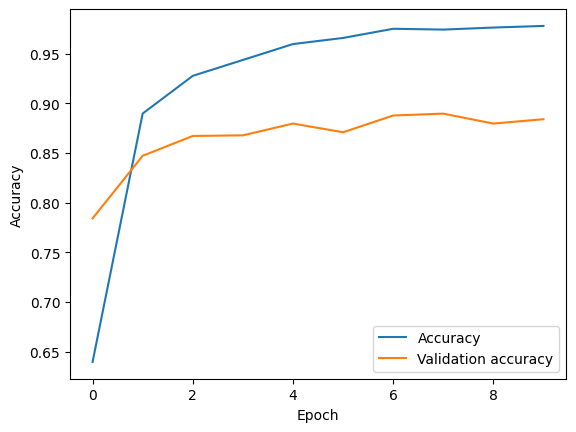

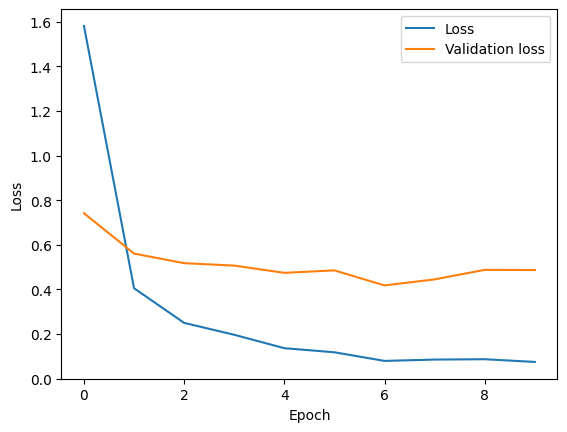

In [12]:
import matplotlib.pyplot as plt



# Access accuracy and loss of the model in each epoch of training
accuracy = model.history.history["accuracy"]
val_accuracy = model.history.history["val_accuracy"]
loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]



# Plot training and validation accuracy
plt.plot(accuracy, label="Accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()



# Plot training and validation loss
plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()


Next, we save the trained model:

In [13]:
import pickle



# Save the trained model
model_pkl_file = "flower_classifier.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)
    

## 4.) Evaluating the model

Finally, it remains to evaluate the trained model on the test data. We do so, via ```model.evaluate```, by calculating the accuracy and the loss of the model on the test data prepared by the ```test_generator``` we defined above.

In [14]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc, "\nTest loss:", test_loss)

C:\Users\jansc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1713/1713 - 296s - 173ms/step - accuracy: 0.9066 - loss: 0.4324

Test accuracy: 0.9065966010093689 
Test loss: 0.43240195512771606


As a last step we also want to plot a confusion matrix for the model evaluated on the test data. The rows of this matrix represent the actual classes of our problem, while the columns represent the predicted classes. For each $i,j \in \{1,2,3,...,102\}$, the entry of the matrix in the $i$-th row and the $j$-th column is an integer defined as the number of images (in the test set) from the $i$-th class which were predicted by the model to be from the class $j$. In particular, the diagonal entries give the number of the correct predictions made for each class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

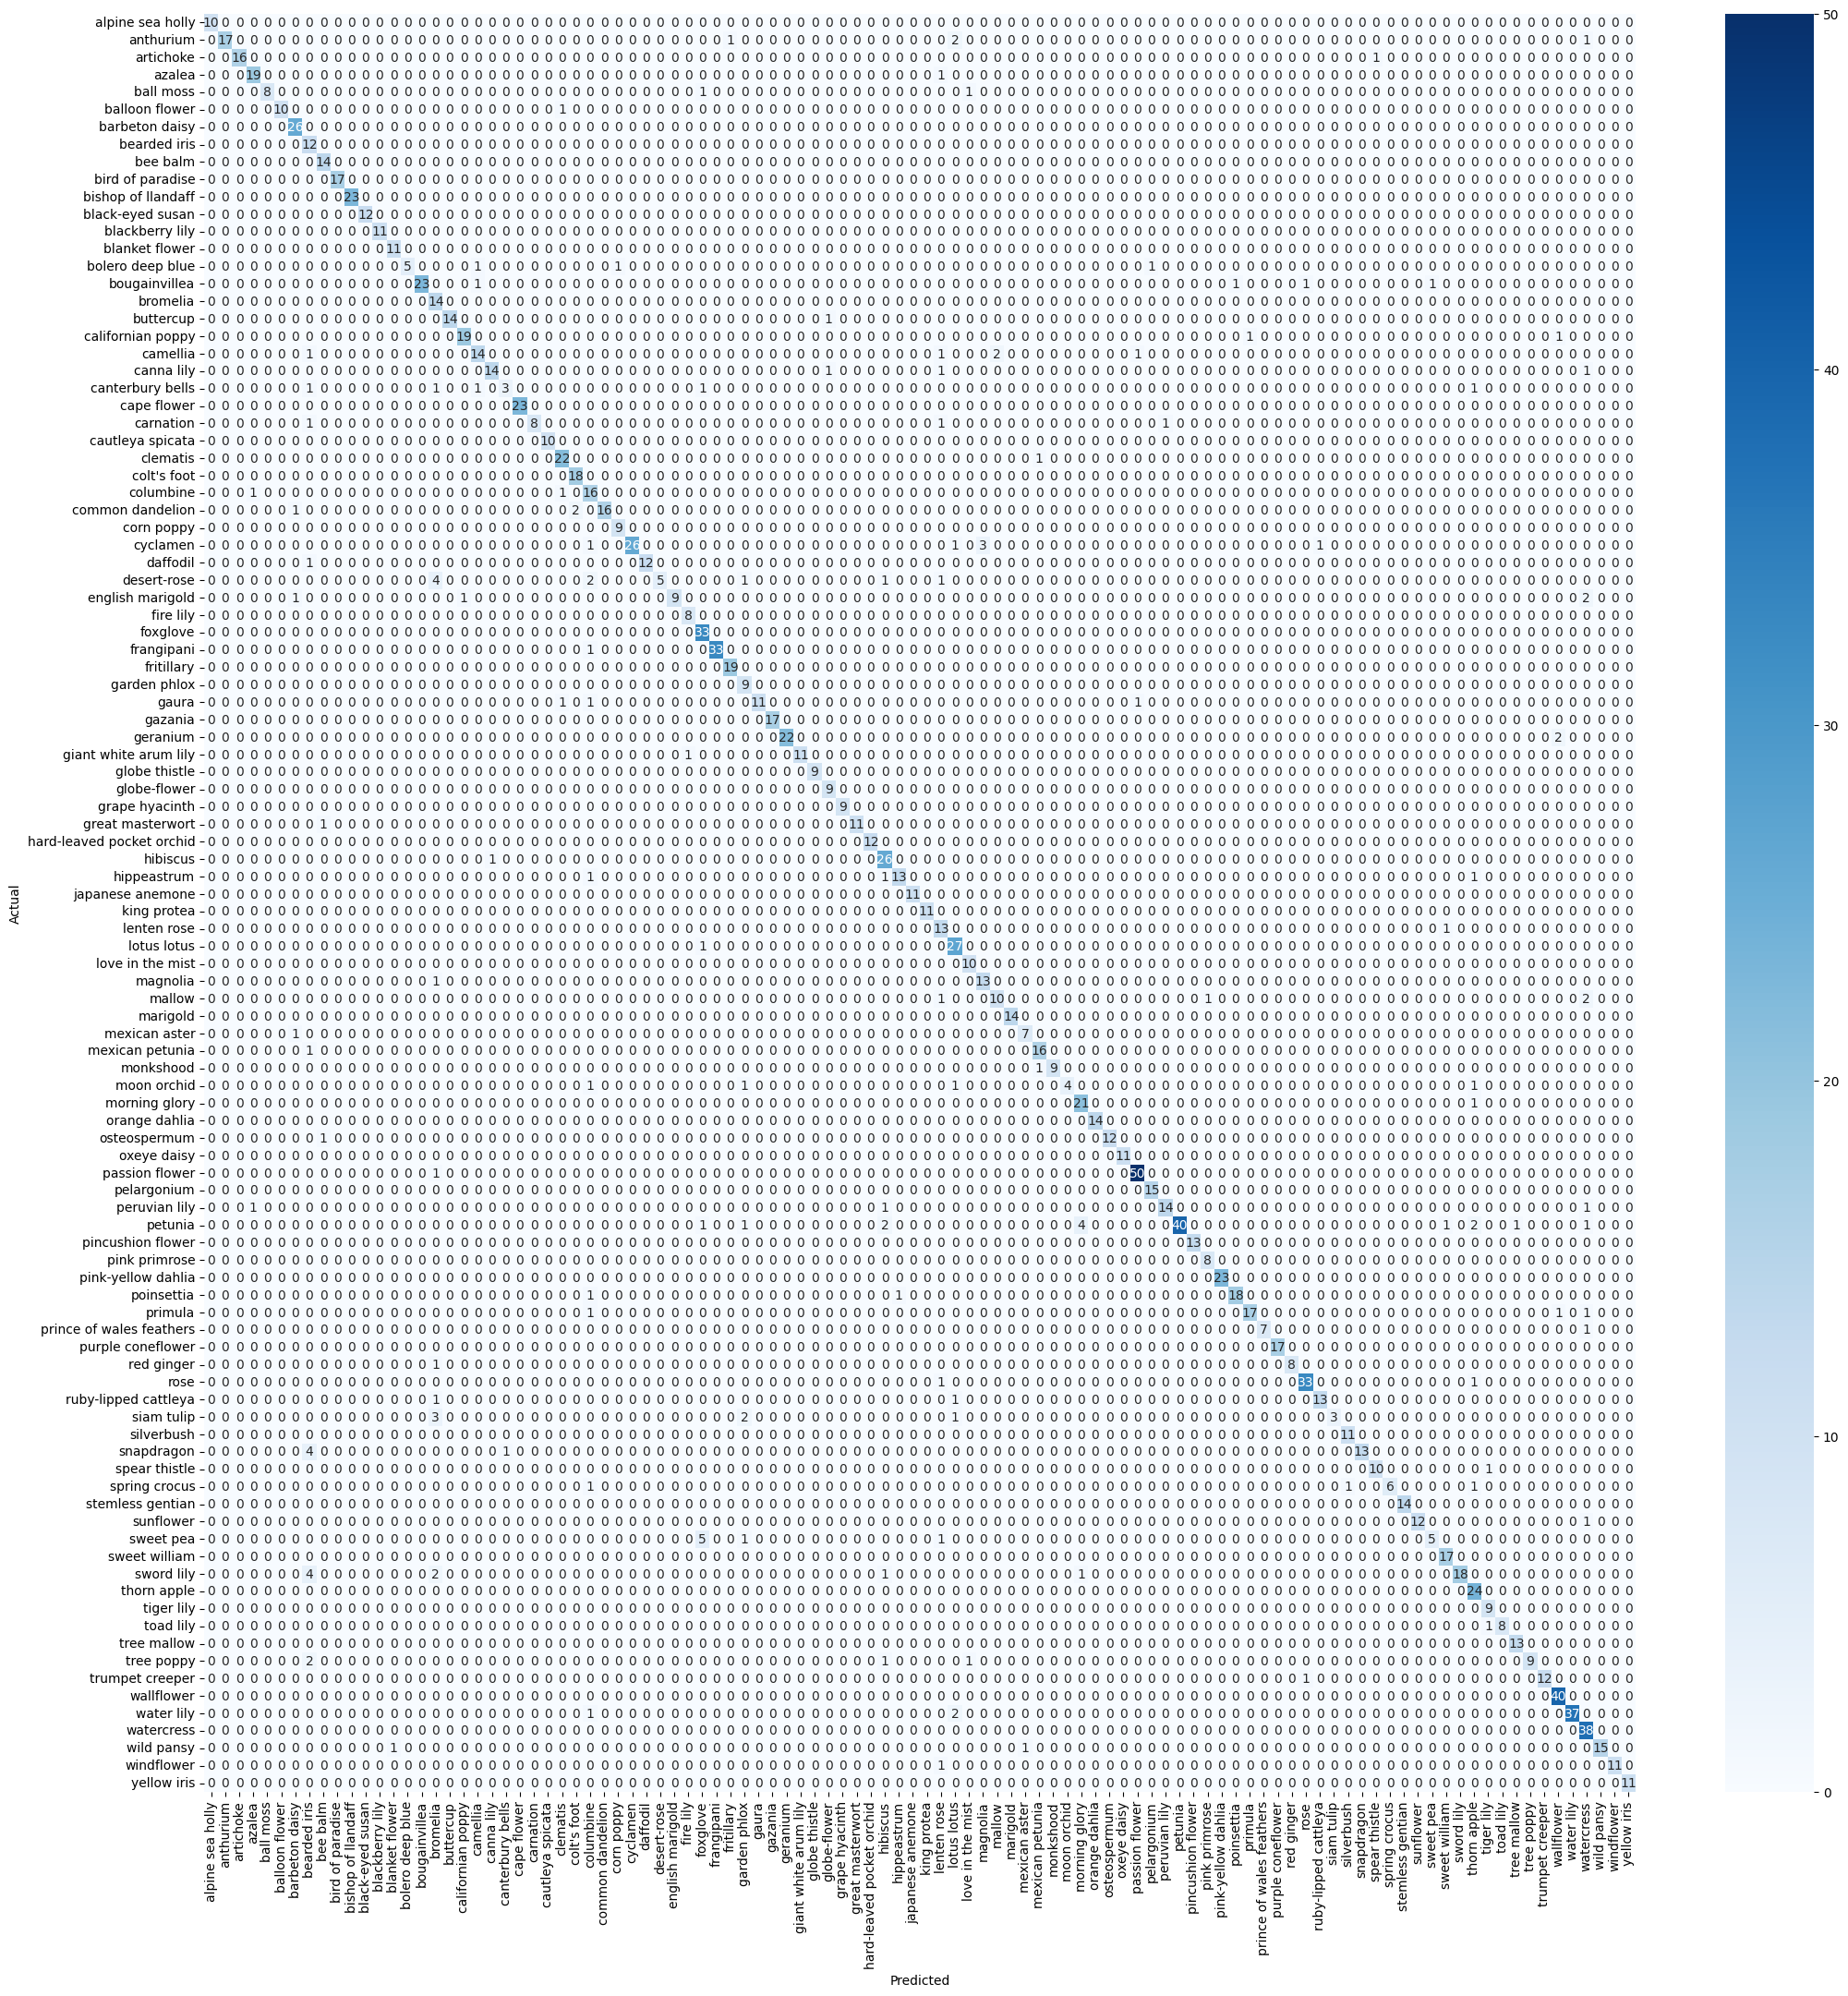

In [15]:
import seaborn as sn
import pandas as pd


filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = []
y_act = []
test_generator.reset()
for _ in range(nb_samples):
    X_test, Y_test = next(test_generator) 
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=["predicted_class","actual_class"])
confusion_matrix = pd.crosstab(out_df["actual_class"],out_df["predicted_class"], rownames=["Actual"], colnames=["Predicted"])

plt.figure(figsize=(25, 25))

sn.heatmap(confusion_matrix,cmap="Blues", annot=True,fmt="d")
plt.show()